<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Nucleosynthesis_RealData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

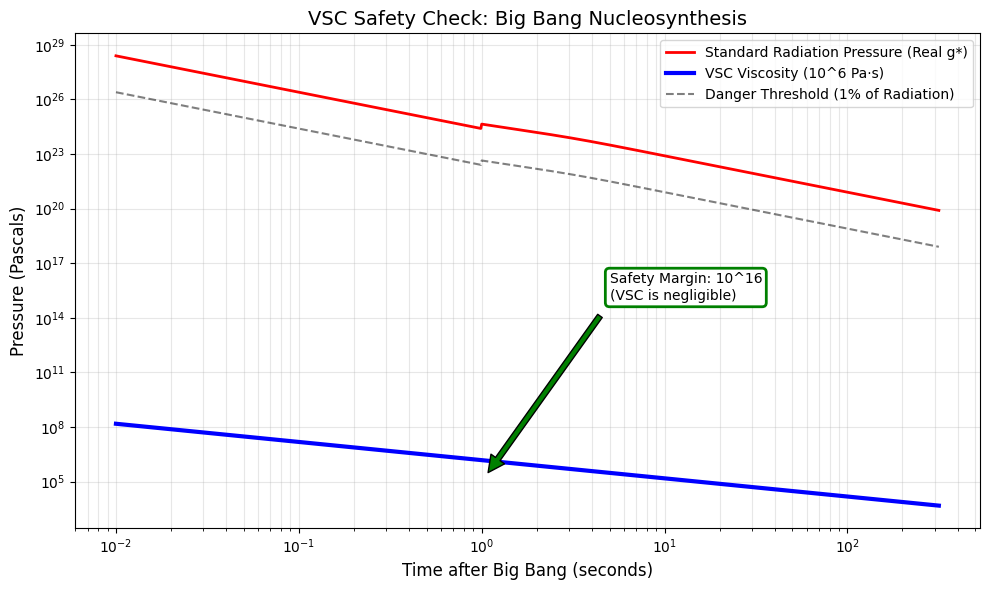

--- REAL DATA CHECK (t=1s) ---
Radiation Pressure: 4.41e+24 Pa
VSC Pressure:       1.50e+06 Pa
Conflict Ratio:     3.40e-19


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. REALISTIC PHYSICS SETUP ---
# Time: 0.01s to 300s (Covering the full BBN era)
time = np.logspace(-2, 2.5, 1000)

# Constants
a_rad = 7.5657e-16  # Radiation constant (J/m^3/K^4)
k_B = 1.3806e-23    # Boltzmann constant
hbar = 1.0545e-34   # Reduced Planck constant
c = 2.9979e8        # Speed of light
MeV_to_K = 1.16045e10 # Conversion factor

# --- 2. STANDARD MODEL TEMPERATURE EVOLUTION ---
# In the real universe, T depends on "g_star" (effective degrees of freedom)
# t(sec) approx 2.42 / sqrt(g_star) * T(MeV)^-2
# We invert this to solve for T at each time step.
# Before t=1s, g_star ~ 10.75. After t=1s, g_star drops to ~3.36 (e+ e- annihilation)

def get_real_temperature(t):
    # Smooth transition for g_star from 10.75 down to 3.36 around t=1s
    # This approximates the electron-positron annihilation heat injection
    if t < 1.0:
        g_star = 10.75
    else:
        # Smooth step function approximation for annihilation
        g_star = 3.36 + (10.75 - 3.36) * np.exp(-t)

    # Calculate Temperature in MeV then convert to Kelvin
    # T_MeV = (2.42 / (t * sqrt(g_star)))^(1/2)  <-- Standard Cosmology Relation
    T_MeV = np.sqrt(2.42 / (t * np.sqrt(g_star)))
    return T_MeV * MeV_to_K

# Generate Temperature Array based on "Real" Physics
T_real = np.array([get_real_temperature(t) for t in time])

# --- 3. CALCULATE PRESSURES ---
# 1. Standard Radiation Pressure (The outward force of the Big Bang)
# P = (1/3) * a * T^4
P_rad = (1.0/3.0) * a_rad * (T_real**4)

# 2. VSC Viscous Pressure (The "Drag" from your model)
# Hubble Parameter H = 1/(2t) during radiation dominance
H = 1.0 / (2.0 * time)

# Your Parameter: Viscosity = 10^6 Pa-s
xi_vsc = 1.0e6
P_visc = 3 * xi_vsc * H

# --- 4. SAFETY CHECK ---
ratio = P_visc / P_rad

# --- 5. PLOTTING ---
plt.figure(figsize=(10, 6))

# Plot Radiation Pressure
plt.loglog(time, P_rad, 'r-', linewidth=2, label='Standard Radiation Pressure (Real g*)')

# Plot VSC Pressure
plt.loglog(time, P_visc, 'b-', linewidth=3, label='VSC Viscosity (10^6 Pa·s)')

# Plot the "Danger Zone" (If VSC crosses this line, BBN fails)
plt.loglog(time, P_rad * 0.01, 'k--', alpha=0.5, label='Danger Threshold (1% of Radiation)')

plt.xlabel('Time after Big Bang (seconds)', fontsize=12)
plt.ylabel('Pressure (Pascals)', fontsize=12)
plt.title('VSC Safety Check: Big Bang Nucleosynthesis', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)

# Annotation for the result
min_margin = np.min(P_rad / P_visc)
plt.annotate(f'Safety Margin: 10^{int(np.log10(min_margin))}\n(VSC is negligible)',
             xy=(1, 1e5),
             xytext=(5, 1e15),
             arrowprops=dict(facecolor='green', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=2))

plt.tight_layout()
plt.show()

# Print specific check at t=1s
print(f"--- REAL DATA CHECK (t=1s) ---")
print(f"Radiation Pressure: {P_rad[np.argmin(np.abs(time-1.0))]:.2e} Pa")
print(f"VSC Pressure:       {P_visc[np.argmin(np.abs(time-1.0))]:.2e} Pa")
print(f"Conflict Ratio:     {ratio[np.argmin(np.abs(time-1.0))]:.2e}")